# Loading dataset

In [1]:
# Loading Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

%matplotlib inline

In [2]:
dataset = pd.read_csv(r"/content/Medicalpremium.csv")
dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
# summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [4]:
dataset.shape

(986, 11)

In [5]:
# Duplicate entries
dataset.duplicated().sum()

0

In [6]:
# Null values
dataset.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [7]:
dataset.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


Since all the fields are numerical, a correlation measure could be used to associate variables.

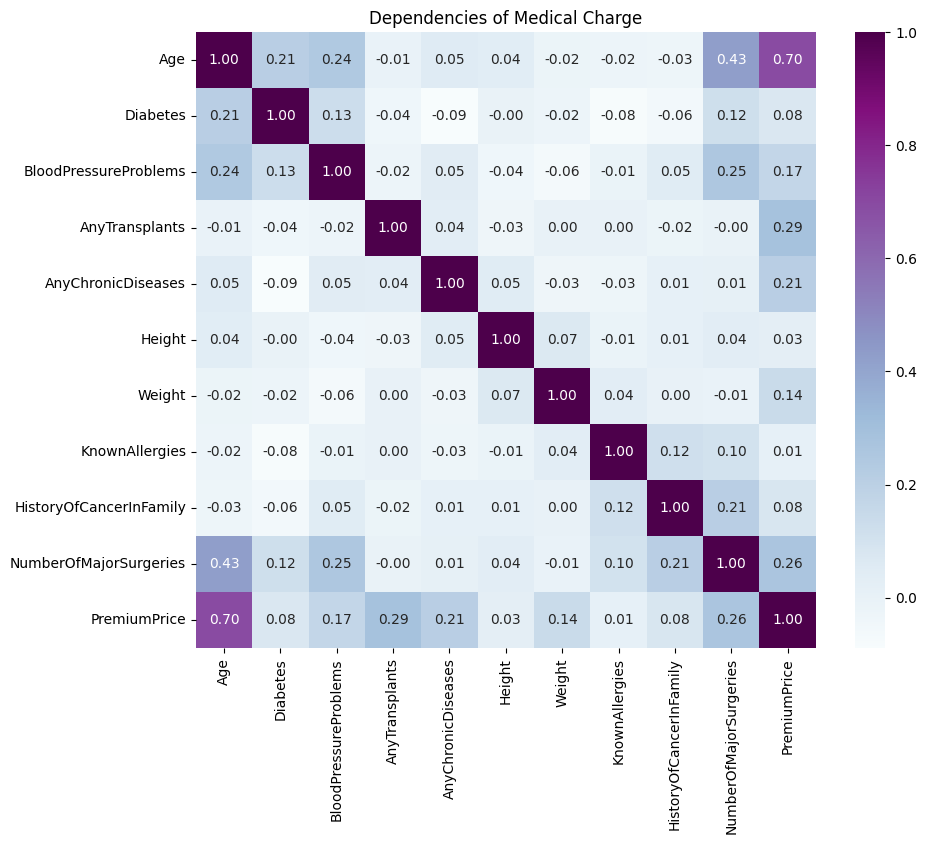

In [8]:
# Correlation between all the coulmns

corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap = 'BuPu', annot = True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charge")
plt.show()

# Exploratory Data Analysis

The correlation matrix presents a higher correlation between age and price, follwed by number of surgeries, transplant, chronic diseases. With age the number of sugeries and blood pressure and diabetes in coreelated though not strongly. We can try to visualize the correlation to associate two variables.

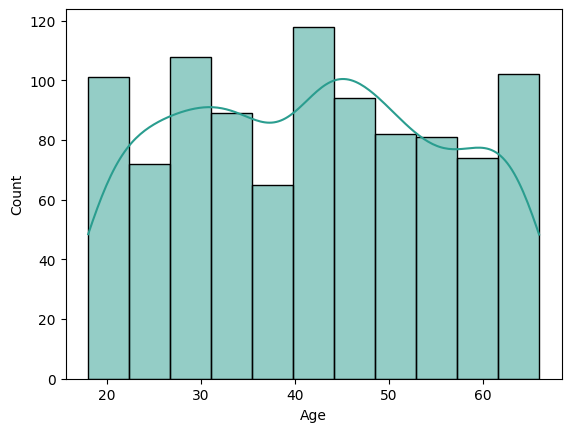

In [9]:
sns.histplot(x='Age', data=dataset,kde=True, color='#2a9d8f')
plt.show()

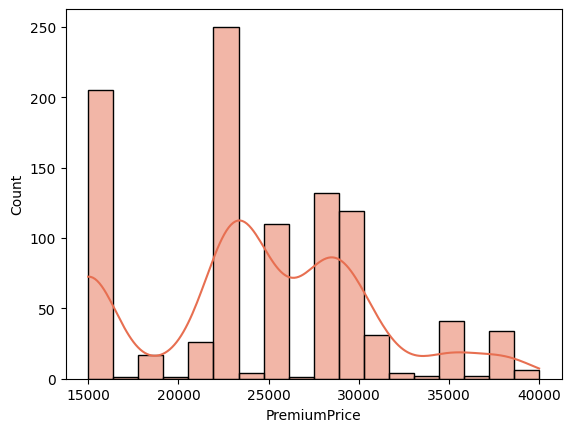

In [10]:
sns.histplot(x='PremiumPrice', data= dataset, kde=True, color='#e76f51')
plt.show()

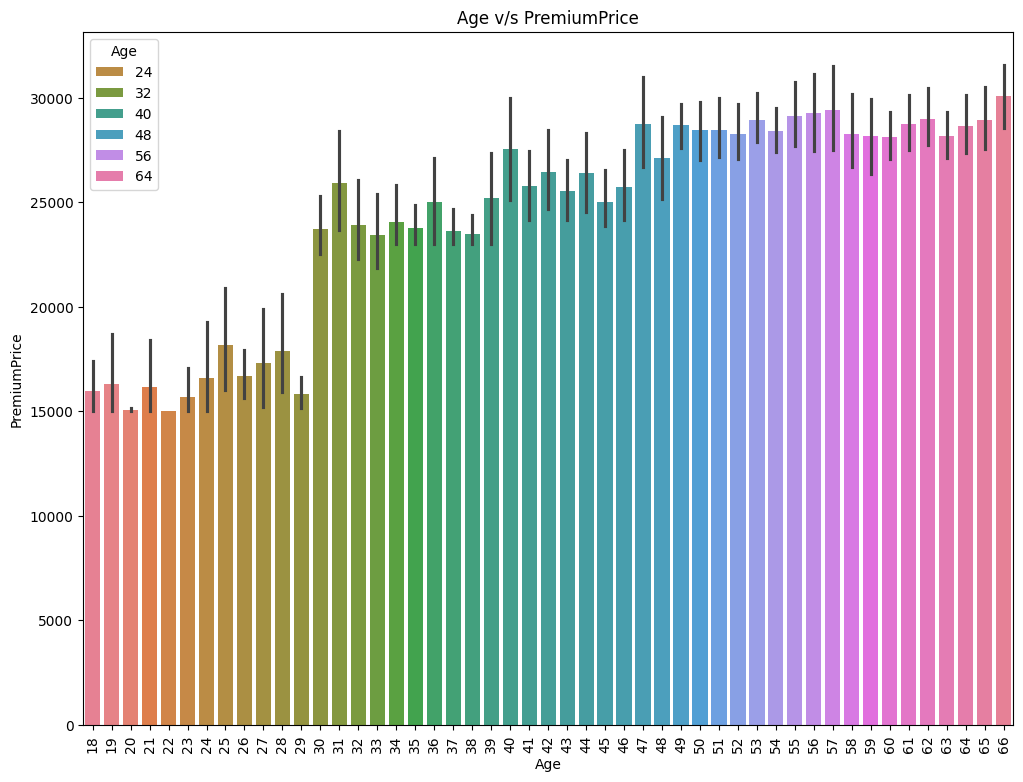

In [11]:
plt.figure(figsize =(12,9))
sns.barplot(y='PremiumPrice', x='Age', hue='Age',legend=True, data = dataset, palette ='husl')
plt.xticks(rotation=90)
plt.title('Age v/s PremiumPrice')
plt.show()

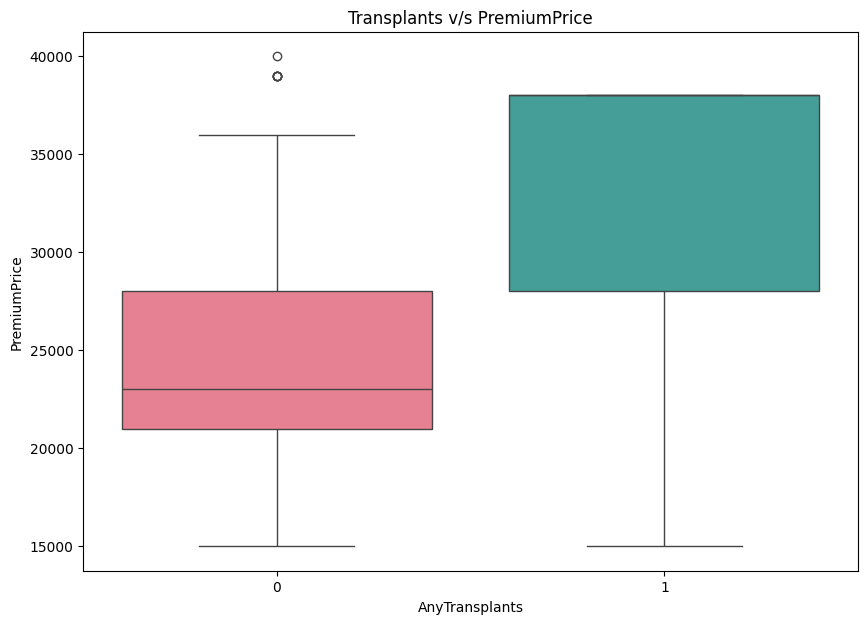

In [12]:
plt.figure(figsize =(10,7))
sns.boxplot(y='PremiumPrice', x='AnyTransplants', hue='AnyTransplants',legend=False, data = dataset, palette ='husl')
plt.title('Transplants v/s PremiumPrice')
plt.show()

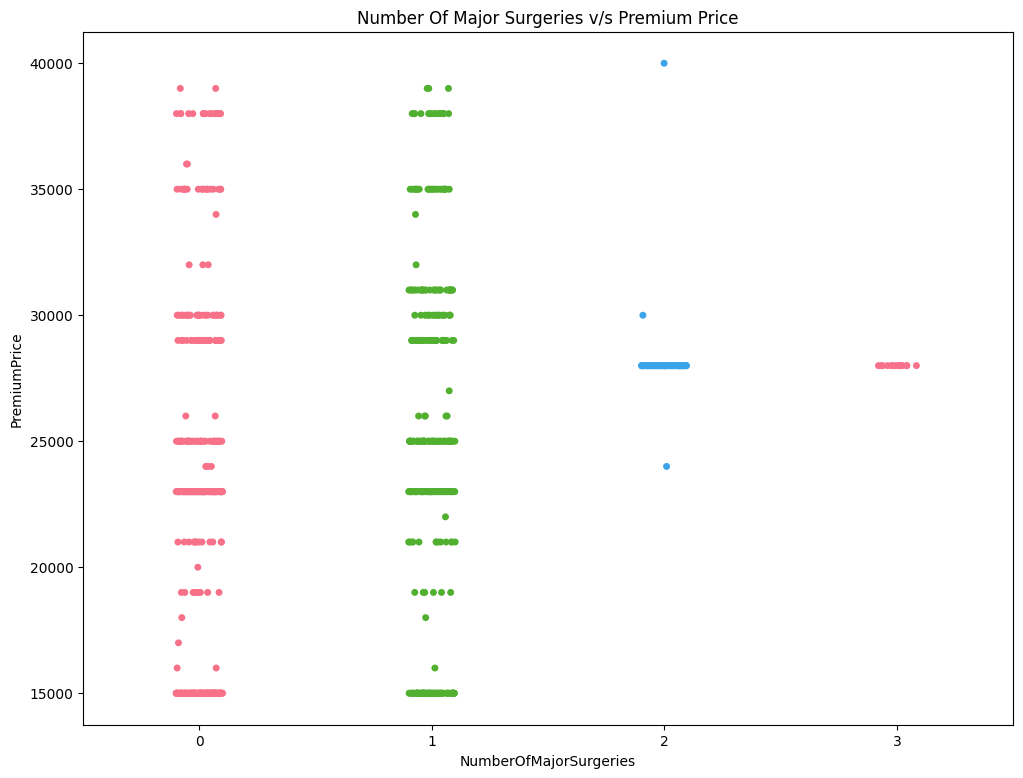

In [13]:
plt.figure(figsize =(12,9))
sns.stripplot(y='PremiumPrice', x='NumberOfMajorSurgeries', hue='NumberOfMajorSurgeries',legend=False, data = dataset, palette ='husl')
plt.title('Number Of Major Surgeries v/s Premium Price')
plt.show()

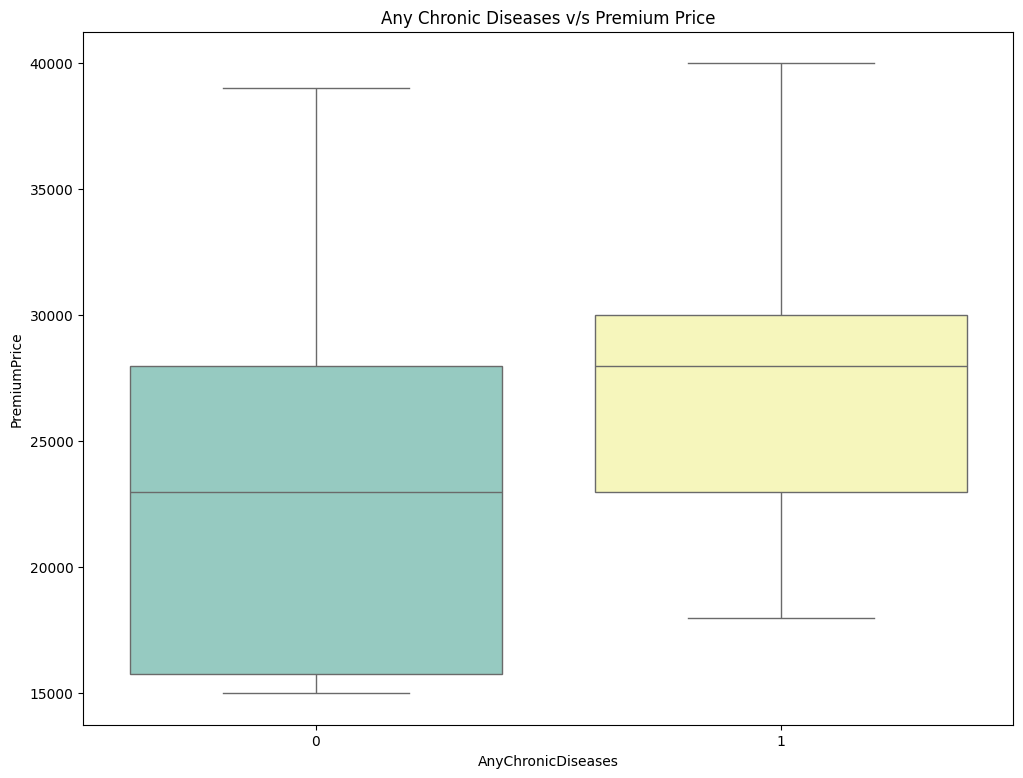

In [14]:
plt.figure(figsize =(12,9))
sns.boxplot(y='PremiumPrice', x='AnyChronicDiseases', hue='AnyChronicDiseases',legend=False, data = dataset, palette ='Set3')
plt.title('Any Chronic Diseases v/s Premium Price')
plt.show()

Dividing the price into low, basic, average, high, and superhigh categories for better comparision

In [15]:
# Creating salary-bins to visualize distribution of Premium Price

pr_lab = ['Low','Basic', 'Average', 'High', 'SuperHigh']
dataset['PremiumLabel'] = pd.cut(dataset['PremiumPrice'], bins=5, labels=pr_lab, precision=0)

In [16]:
dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel
0,45,0,0,0,0,155,57,0,0,0,25000,Basic
1,60,1,0,0,0,180,73,0,0,0,29000,Average
2,36,1,1,0,0,158,59,0,0,1,23000,Basic
3,52,1,1,0,1,183,93,0,0,2,28000,Average
4,38,0,0,0,1,166,88,0,0,1,23000,Basic


In [17]:
counts = dataset['PremiumLabel'].value_counts()
print(counts)

PremiumLabel
Basic        383
Average      259
Low          224
High          78
SuperHigh     42
Name: count, dtype: int64


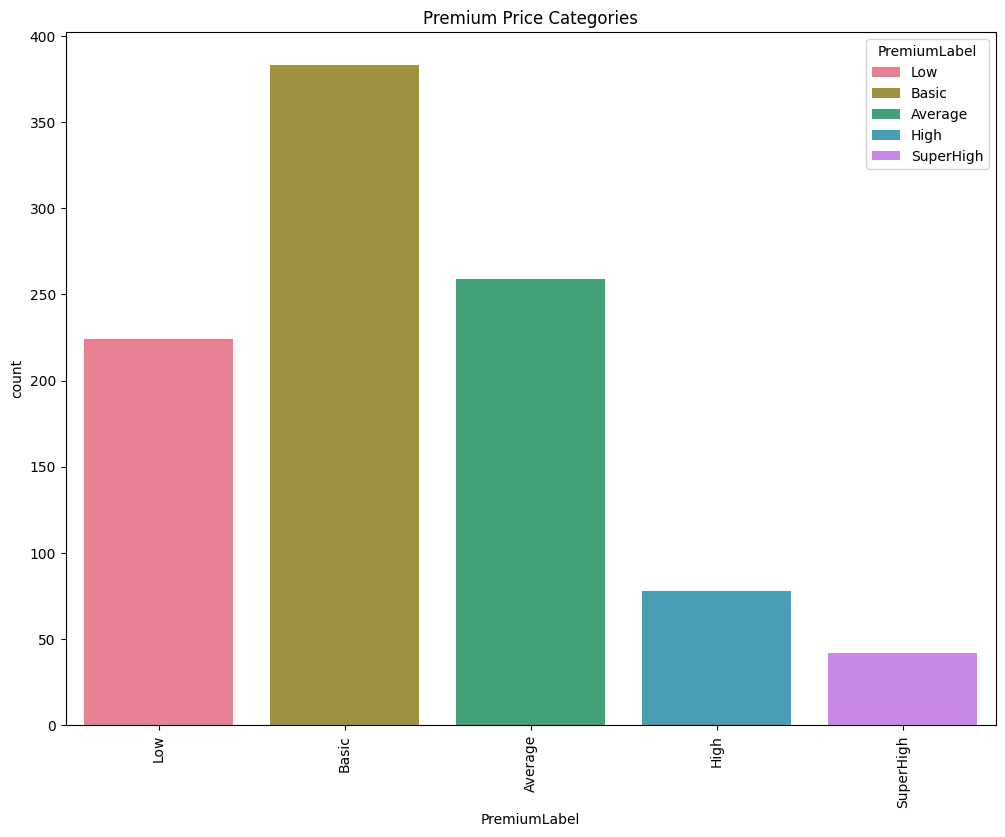

In [18]:
plt.figure(figsize =(12,9))
sns.countplot(x='PremiumLabel', hue='PremiumLabel',legend=True, data = dataset, palette ='husl')
plt.xticks(rotation=90)
plt.title('Premium Price Categories')
plt.show()

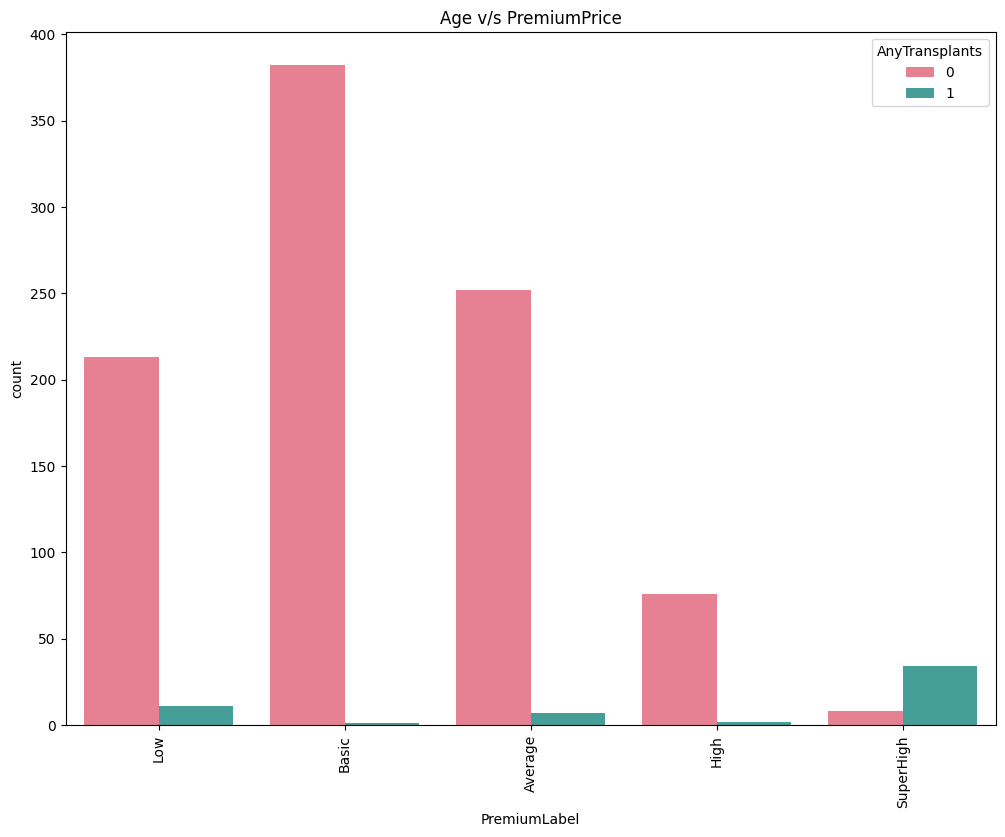

In [19]:
plt.figure(figsize =(12,9))
sns.countplot(x='PremiumLabel', hue='AnyTransplants',legend=True, data = dataset, palette ='husl')
plt.xticks(rotation=90)
plt.title('Age v/s PremiumPrice')
plt.show()

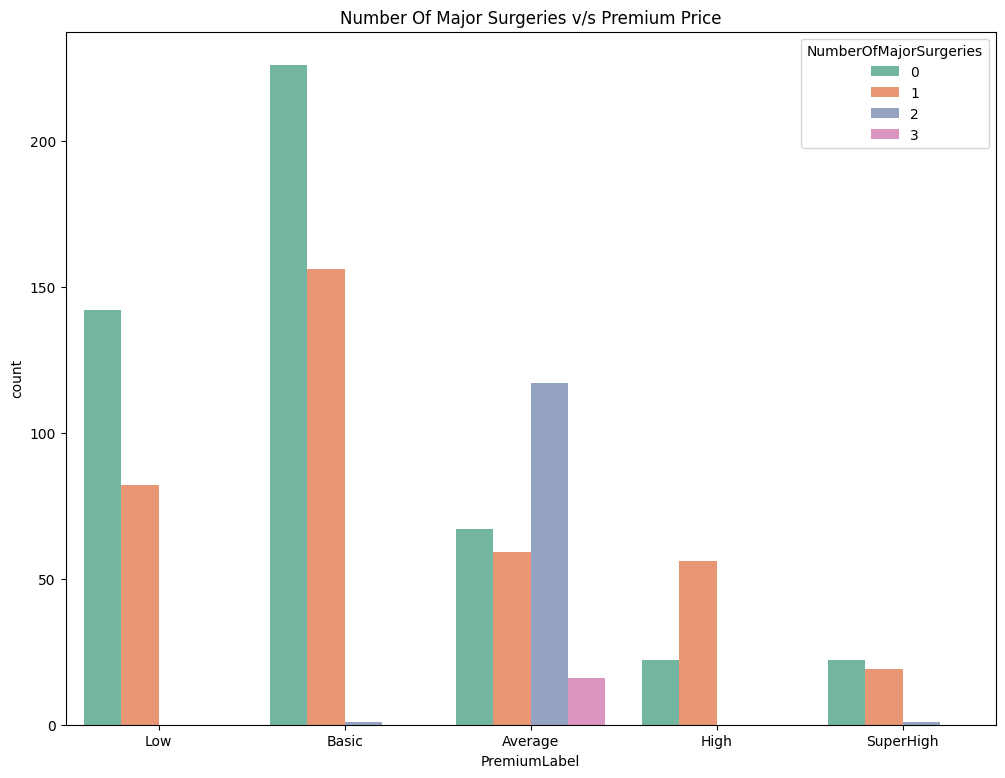

In [20]:
plt.figure(figsize =(12,9))
sns.countplot(x='PremiumLabel',  hue='NumberOfMajorSurgeries',legend=True, data = dataset, palette ='Set2')
plt.title('Number Of Major Surgeries v/s Premium Price')
plt.show()

# Data Preprocessing

In [21]:
dataset.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel'],
      dtype='object')

In [22]:
# Converting new categorical columns to numerical

dataset = pd.get_dummies(data=dataset, columns =['PremiumLabel'])


In [23]:
dataset.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel_Low', 'PremiumLabel_Basic', 'PremiumLabel_Average',
       'PremiumLabel_High', 'PremiumLabel_SuperHigh'],
      dtype='object')

In [24]:
dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel_Low,PremiumLabel_Basic,PremiumLabel_Average,PremiumLabel_High,PremiumLabel_SuperHigh
0,45,0,0,0,0,155,57,0,0,0,25000,False,True,False,False,False
1,60,1,0,0,0,180,73,0,0,0,29000,False,False,True,False,False
2,36,1,1,0,0,158,59,0,0,1,23000,False,True,False,False,False
3,52,1,1,0,1,183,93,0,0,2,28000,False,False,True,False,False
4,38,0,0,0,1,166,88,0,0,1,23000,False,True,False,False,False


# Model Training

Using a Random Forest model, a calssification/ prediction model for analysing the multi-variable dataset.

In [25]:
# Getting features and target dataset

x = dataset.drop('PremiumPrice', axis=1)
y = dataset['PremiumPrice']


In [26]:
# Scaling the daaset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xsc = sc.fit_transform(x)
xsc = pd.DataFrame(xsc, columns=x.columns)

In [27]:
# Selecting top features which are aligned with premium price

from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(xsc, y)
mi_scores = pd.Series(mi_scores, name ="MI Scores", index =xsc.columns)
mi_scores = mi_scores.sort_values(ascending=False)
(mi_scores*100).head(10).index

Index(['Age', 'PremiumLabel_Basic', 'PremiumLabel_Average', 'PremiumLabel_Low',
       'NumberOfMajorSurgeries', 'PremiumLabel_High', 'AnyChronicDiseases',
       'Weight', 'PremiumLabel_SuperHigh', 'AnyTransplants'],
      dtype='object')

In [28]:
features = list((mi_scores*100).head(10).index)
xsc = xsc[features]
xsc

,Age,PremiumLabel_Basic,PremiumLabel_Average,PremiumLabel_Low,NumberOfMajorSurgeries,PremiumLabel_High,AnyChronicDiseases,Weight,PremiumLabel_SuperHigh,AnyTransplants
0,0.233197,1.254756,-0.596874,-0.542184,-0.891187,-0.293092,-0.469358,-1.399250,-0.210930,-0.243056
1,1.307981,-0.796968,1.675395,-0.542184,-0.891187,-0.293092,-0.469358,-0.277062,-0.210930,-0.243056
2,-0.411674,1.254756,-0.596874,-0.542184,0.444239,-0.293092,-0.469358,-1.258976,-0.210930,-0.243056
3,0.734763,-0.796968,1.675395,-0.542184,1.779665,-0.293092,2.130569,1.125674,-0.210930,-0.243056
4,-0.268369,1.254756,-0.596874,-0.542184,0.444239,-0.293092,2.130569,0.774990,-0.210930,-0.243056
...,...,...,...,...,...,...,...,...,...,...
981,-1.701415,-0.796968,-0.596874,1.844393,-0.891187,-0.293092,-0.469358,-0.697882,-0.210930,-0.243056
982,1.594590,-0.796968,1.675395,-0.542184,3.115090,-0.293092,-0.469358,-0.487472,-0.210930,-0.243056
983,1.021372,-0.796968,1.675395,-0.542184,0.444239,-0.293092,-0.469358,-0.417335,-0.210930,-0.243056
984,0.376502,-0.796968,-0.596874,-0.542184,0.444239,-0.293092,-0.469358,-0.277062,4.740906,-0.243056


In [29]:
y.shape

(986,)

In [30]:
# importing model

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(xsc, y, random_state =33, test_size=0.3)


In [31]:
#Building ML model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [32]:
regressor = RandomForestRegressor(n_jobs =-1, verbose=2)
param_grid = {'n_estimators':[60,50,55],
             'criterion':['squared_error','absolute_error'],
             'max_depth':[7],
             'min_samples_split':[3],
             'max_features':['sqrt', 'log2', None]}
model = GridSearchCV(regressor, param_grid = param_grid, cv=3, n_jobs =-1, verbose=1)


In [33]:
model.fit(Xtrain, ytrain)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50building tree 10 of 50

building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50building tree 16 of 50
building tree 17 of 50

building tree 18 of 50building tree 19 of 50

building tree 20 of 50
building tree 21 of 50building tree 22 of 50

building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50building tree 28 of 50

building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50building tree 37 of 50

building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
build

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, verbose=2),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [7],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [3],
                         'n_estimators': [60, 50, 55]},
             verbose=1)

In [34]:
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': None,
 'min_samples_split': 3,
 'n_estimators': 50}

In [35]:
model.best_score_

0.9950976749840376

In [36]:
predicted_y = model.predict(Xtest)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


In [37]:
# Testing accuracy

from sklearn.metrics import r2_score
r2_score(ytest, predicted_y)

0.9929433972761414